# make a figure that shows qualitatively the effect of increasing the attractive force magnitude on mean annihilation rates on a log-log plot
Tim Tyree<br>
9.20.2021

In [1]:
# %matplotlib notebook
from lib.my_initialization import *
import random,scipy
from scipy import stats

import random,scipy
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib as mpl #for colorbar
from scipy import stats
#DONE: hook this routine up to dask
#DONT: hook this routine up to dask_cuda

from lib.viewer.gener_q_vs_w_for_df import *

from lib.my_initialization import *
from lib import *
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline


In [2]:
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
# input_fn_star=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_ar_star.csv"
# # input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/black_star_run_1_all_powerlaw_fits.csv"

# df=pd.read_csv(input_fn_star)
# #map columns of star df to df
# df['varkappa']=df['astar']
# df['r']=df['rstar']
# df['model_name_full']=df['model_name']
# df_star=df.copy()

# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_all_powerlaw_fits.csv"
input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_15_all_powerlaw_fits.csv"
df=pd.read_csv(input_fn)
df.head()

,m,Delta_m,M,Delta_M,Rsq,rmse,rmse_full,model_name_full,q_min,q_max,...,D,varkappa,x0,L,force_code,neighbor,reflect,set_second,no_repulsion,no_attraction
0,1.477497,0.017889,10.233038,0.458553,0.996691,0.254568,2.192560,fk_ncbc,0.1,1.0,...,1.6,9,0,10,2,0,0,0,0,0
1,1.726534,0.013938,18.451423,0.663628,0.998526,0.252599,0.849591,lr_pbc,0.1,1.0,...,1.0,9,0,10,2,0,1,0,0,0
2,1.361442,0.010685,34.324471,1.345462,0.998607,0.557511,10.602247,lr_pbc,0.1,1.0,...,1.2,90,0,10,2,0,1,0,0,0
3,3.050656,0.082928,110.878921,27.313205,0.983541,8.696932,40.571684,lr_pbc,0.1,1.0,...,1.6,1,0,10,2,0,0,0,0,0
4,1.961670,0.014691,3.008488,0.072870,0.998732,0.053220,1.228204,fk_pbc,0.1,1.0,...,1.9,1,0,10,2,0,0,0,0,0


In [4]:
r=0.1
kappa=250
D=0.7
# varkappa_lst=sorted(set(df['varkappa'].values))
# varkappa_lst

#TODO: extract xy values for kappa, r, D fixed to any value, which I can change later
#define constant parameters
reflect=0
force_code=2
set_second=0
neighbor=0
no_attraction=0
no_repulsion=0
# kappa=100
L=10

#template query for the DataFrame
query =(df.set_second==set_second)
query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
query&=(df.neighbor==neighbor)&(df.force_code==force_code)
query&=df.r==r
query&=df.kappa==kappa
query&=df.D==D
query&=df.L==L
# query&=df.x0==x0
query_template=query.copy()

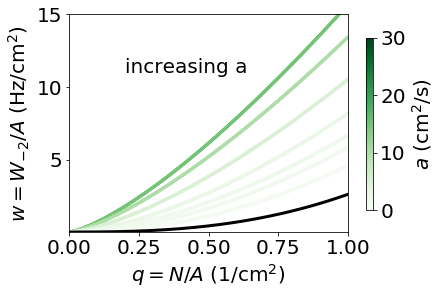

In [37]:
num_points = 25
c_col = 'rmse_full'
vmin = 0.
vmax = .25
fontsize = 20
x1lim = [0, 1]
x2lim = [1e-2, 15]
# x1lim=[5,10]
# x2lim=[50,350]
fig, ax = plt.subplots(figsize=(5,4))
varkappa_lst = sorted(set(df['varkappa'].values))
varkappa_lst = list(reversed([0,1,2,3, 5, 10, 20, 30]))

vmin = 0
vmax = np.max(varkappa_lst)
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled
    M = M_returned[0]
    nu = nu_returned[0]
    x_values = np.linspace(0, 1, 1000)
    y_values = M * x_values**nu
    c_values = varkappa + 0. * x_values

    #scatter plot
    if varkappa==0:
        ax.plot(x_values,y_values,c='black',alpha=1.,lw=3)#,s=5)
        first_case=False
    else:
        ax.scatter(x_values,y_values,
               c=c_values,cmap='Greens',alpha=0.7,s=5,vmin=vmin,vmax=2*vmax)
# title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax,
           x1lim=x1lim,
           x2lim=x2lim,
           x1label=r'$q=N/A$ (1/cm$^{2}$)',
           x2label=r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
           title=None,
           fontsize=fontsize,
           use_loglog=False)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Greens
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

ax.annotate("increasing a", xy=(0.3, 11), xytext=(0.2, 11),fontsize=fontsize)
plt.show()

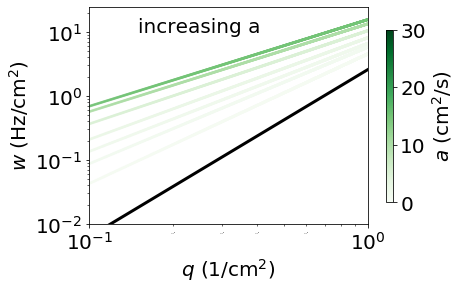

In [45]:
num_points = 25
c_col = 'rmse_full'
vmin = 0.
vmax = .25
fontsize = 20
x1lim = [1e-1, 1]
x2lim = [1e-2, 25]
# x1lim=[5,10]
# x2lim=[50,350]
fig, ax = plt.subplots(figsize=(5,4))
varkappa_lst = sorted(set(df['varkappa'].values))
varkappa_lst = list(reversed([0,1,2,3, 5, 10, 20, 30]))

vmin = 0
vmax = np.max(varkappa_lst)
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled
    M = M_returned[0]
    nu = nu_returned[0]
    x_values = np.linspace(0, 1, 1000)
    y_values = M * x_values**nu
    c_values = varkappa + 0. * x_values

    #scatter plot
    if varkappa==0:
        ax.plot(x_values,y_values,c='black',alpha=1.,lw=3)#,s=5)
        first_case=False
    else:
        ax.scatter(x_values,y_values,
               c=c_values,cmap='Greens',alpha=0.7,s=3,vmin=vmin,vmax=2*vmax)
# title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax,
           x1lim=x1lim,
           x2lim=x2lim,
           x1label=r'$q$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
           x2label=r'$w$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
           title=None,
           fontsize=fontsize,
           use_loglog=True)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Greens
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

ax.annotate("increasing a", xy=(0.3, 11), xytext=(0.15, 10),fontsize=fontsize)
plt.show()

In [33]:
ax.plot?

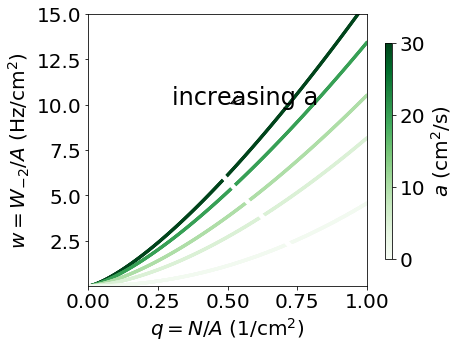

In [6]:
num_points = 25
c_col = 'rmse_full'
vmin = 0.
vmax = .25
fontsize = 20
x1lim = [0, 1]
x2lim = [1e-2, 15]
# x1lim=[5,10]
# x2lim=[50,350]
fig, ax = plt.subplots(figsize=(5,5))
varkappa_lst = sorted(set(df['varkappa'].values))
varkappa_lst = list(reversed([1, 5, 10, 20, 30]))

vmin = 0
vmax = np.max(varkappa_lst)
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled
    M = M_returned[0]
    nu = nu_returned[0]
    x_values = np.linspace(0, 1, 1000)
    y_values = M * x_values**nu
    c_values = varkappa + 0. * x_values

    #scatter plot
    # ax.scatter(x_values,y_values,c=c_values,cmap='Greens',alpha=0.7,s=50)
    ax.scatter(x_values,
               y_values,
               c=c_values,
               cmap='Greens',
               alpha=0.7,
               s=5,
               vmin=vmin,
               vmax=vmax)
# title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax,
           x1lim=x1lim,
           x2lim=x2lim,
           x1label=r'$q=N/A$ (1/cm$^{2}$)',
           x2label=r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
           title=None,
           fontsize=fontsize,
           use_loglog=False)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Greens
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

#TODO: add an arrow that indicates increasing a
arrow = ax.arrow(0.8,
                 1,
                 -0.5,
                 8,
#                  label='My label',
                 color='w',
                 linewidth=4,
                 head_width=0.05,
                 head_length=1.5,
                 length_includes_head=False,
                 overhang=-.01,
                 head_starts_at_zero=False,
                 width=0.005,
                capstyle='butt',# 'round', 'projecting'},
#                  fill=True
                )
ax.annotate("increasing a", xy=(0.5, 10), xytext=(0.3, 10), arrowprops=dict(arrowstyle="->"),fontsize=24)
plt.show()

In [7]:
#TODO: plot a versus M and a versus nu on the same axis


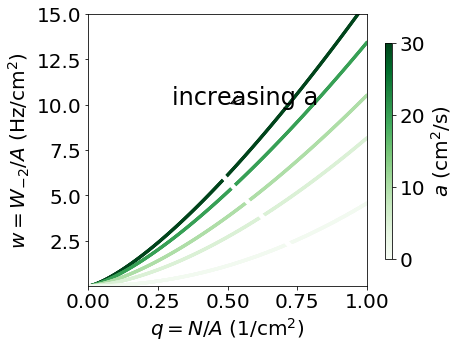

In [8]:
num_points = 25
c_col = 'rmse_full'
vmin = 0.
vmax = .25
fontsize = 20
x1lim = [0, 1]
x2lim = [1e-2, 15]
# x1lim=[5,10]
# x2lim=[50,350]
fig, ax = plt.subplots(figsize=(5,5))
varkappa_lst = sorted(set(df['varkappa'].values))
varkappa_lst = list(reversed([1, 5, 10, 20, 30]))

vmin = 0
vmax = np.max(varkappa_lst)
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled
    M = M_returned[0]
    nu = nu_returned[0]
    x_values = np.linspace(0, 1, 1000)
    y_values = M * x_values**nu
    c_values = varkappa + 0. * x_values

    #scatter plot
    # ax.scatter(x_values,y_values,c=c_values,cmap='Greens',alpha=0.7,s=50)
    ax.scatter(x_values,
               y_values,
               c=c_values,
               cmap='Greens',
               alpha=0.7,
               s=5,
               vmin=vmin,
               vmax=vmax)
# title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax,
           x1lim=x1lim,
           x2lim=x2lim,
           x1label=r'$q=N/A$ (1/cm$^{2}$)',
           x2label=r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
           title=None,
           fontsize=fontsize,
           use_loglog=False)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Greens
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

#TODO: add an arrow that indicates increasing a
arrow = ax.arrow(0.8,
                 1,
                 -0.5,
                 8,
#                  label='My label',
                 color='w',
                 linewidth=4,
                 head_width=0.05,
                 head_length=1.5,
                 length_includes_head=False,
                 overhang=-.01,
                 head_starts_at_zero=False,
                 width=0.005,
                capstyle='butt',# 'round', 'projecting'},
#                  fill=True
                )
ax.annotate("increasing a", xy=(0.5, 10), xytext=(0.3, 10), arrowprops=dict(arrowstyle="->"),fontsize=24)
plt.show()

# plot a versus the power law fit parameters

In [53]:
# input_fn_star=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_ar_star.csv"
# # input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/black_star_run_1_all_powerlaw_fits.csv"

# df=pd.read_csv(input_fn_star)
# #map columns of star df to df
# df['varkappa']=df['astar']
# df['r']=df['rstar']
# df['model_name_full']=df['model_name']
# df_star=df.copy()

# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_all_powerlaw_fits.csv"
input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_15_all_powerlaw_fits.csv"
df=pd.read_csv(input_fn)
df.head()

,m,Delta_m,M,Delta_M,Rsq,rmse,rmse_full,model_name_full,q_min,q_max,...,D,varkappa,x0,L,force_code,neighbor,reflect,set_second,no_repulsion,no_attraction
0,1.477497,0.017889,10.233038,0.458553,0.996691,0.254568,2.192560,fk_ncbc,0.1,1.0,...,1.6,9,0,10,2,0,0,0,0,0
1,1.726534,0.013938,18.451423,0.663628,0.998526,0.252599,0.849591,lr_pbc,0.1,1.0,...,1.0,9,0,10,2,0,1,0,0,0
2,1.361442,0.010685,34.324471,1.345462,0.998607,0.557511,10.602247,lr_pbc,0.1,1.0,...,1.2,90,0,10,2,0,1,0,0,0
3,3.050656,0.082928,110.878921,27.313205,0.983541,8.696932,40.571684,lr_pbc,0.1,1.0,...,1.6,1,0,10,2,0,0,0,0,0
4,1.961670,0.014691,3.008488,0.072870,0.998732,0.053220,1.228204,fk_pbc,0.1,1.0,...,1.9,1,0,10,2,0,0,0,0,0


In [54]:
r=0.1
kappa=250
D=0.7
# varkappa_lst=sorted(set(df['varkappa'].values))
# varkappa_lst

#TODO: extract xy values for kappa, r, D fixed to any value, which I can change later
#define constant parameters
reflect=0
force_code=2
set_second=0
neighbor=0
no_attraction=0
no_repulsion=0
# kappa=100
L=10

#template query for the DataFrame
query =(df.set_second==set_second)
query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
query&=(df.neighbor==neighbor)&(df.force_code==force_code)
query&=df.r==r
query&=df.kappa==kappa
query&=df.D==D
query&=df.L==L
# query&=df.x0==x0
query_template=query.copy()

In [55]:
#extract the data
varkappa_lst = sorted(set(df['varkappa'].values))
M_lst=[];nu_lst=[]
Delta_M_lst=[];Delta_nu_lst=[]
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    Delta_M = df.loc[query, 'Delta_M'].values[:1]
    Delta_nu = df.loc[query, 'Delta_m'].values[:1]
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled
    M = M_returned[0]
    nu = nu_returned[0]
    M_lst.append(M)
    nu_lst.append(nu)
    Delta_M_lst.append(Delta_M)
    Delta_nu_lst.append(Delta_nu)
    
M_values=np.array(M_lst)
nu_values=np.array(nu_lst)
Delta_M_values=np.array(Delta_M_lst).flatten()
Delta_nu_values=np.array(Delta_nu_lst).flatten()

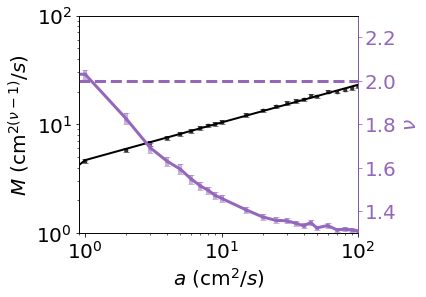

for D=0.7, kappa=250, r=0.1 fixed,
the powerlaw OLS fit for loglog of M versus a
m=0.34662844685683697
Delta_m=0.007544034420649642
b=1.5430792099954873
Delta_b=0.023831286783598894
Rsquared=0.9972947153026107


In [93]:
num_points = 25
c_col = 'rmse_full'
vmin = 0.
vmax = .25
fontsize = 20
x1lim = [9e-1, 100]
x2lim = [1e-0, 100]
y2lim = [1.3,2.3]
x_values=np.array(varkappa_lst)

fig, ax = plt.subplots(1, sharex=True,figsize=(5,4))
ax_twin = ax.twinx() # Create twin axis for the first subplot


x_values=np.array(varkappa_lst)
y_values=M_values
yerr_values=Delta_M_values
PlotErrorBarScatter(ax, x_values, y_values, yerr_values, title=None, title_fontsize=fontsize, label=None, alpha=0.5, c='k', markersize=3, elinewidth=4, capsize=3)

dict_out=compute_95CI_ols(np.log(x_values[1:]),np.log(y_values[1:]))
# yhat_values=np.exp(dict_out['m']*np.log(x_values)+dict_out['b'])
yhat_values=x_values**dict_out['m']*np.exp(dict_out['b'])#/dict_out['m'])


ax.plot(x_values,yhat_values,c='k',lw=2)

# ax.fill_between(x_values,M_values+Delta_M_values,M_values-Delta_M_values,'g-',lw=3)
# ax_twin.plot(x_values,nu_lst,'g--',lw=3)

x_values=np.array(varkappa_lst)
y_values=nu_values
yerr_values=Delta_nu_values
PlotErrorBarScatter(ax_twin, x_values, y_values, yerr_values, title=None, title_fontsize=fontsize, label=None, alpha=0.5, c='C4', markersize=3, elinewidth=4, capsize=3)
ax_twin.plot(x_values,nu_values,c='C4',lw=3)
ax_twin.plot(x_values,2+0.*nu_values,'--',c='C4',lw=3)

FormatAxes(ax,
           x1lim=x1lim,
           x2lim=x2lim,
           x1label=r'$a$ (cm$^{2}/s$)',
           x2label=r'$M$ (cm$^{2(\nu-1)}/s$)',
           title=None,
           fontsize=fontsize,
           use_loglog=True)
# ax_twin.set_yscale('log')
ax_twin.spines['right'].set_color('C4')
ax_twin.tick_params(axis='both', which='major', labelsize=fontsize)#,**kwargs)
ax_twin.tick_params(axis='both', which='minor', labelsize=0)#,**kwargs)
ax_twin.set_ylabel(r'$\nu$', fontsize=fontsize)
ax_twin.tick_params(axis='y', colors='C4')
ax_twin.yaxis.label.set_color('C4')
ax_twin.set_ylim(y2lim)

plt.show()
print(f'for D={D}, kappa={kappa}, r={r} fixed,')
print('the powerlaw OLS fit for loglog of M versus a')
print_dict(dict_out)

((25,), (25,), (25,))


True

In [17]:
from inspect import getsource
print(getsource(format_plot))

def format_plot(ax,xlabel,ylabel,fontsize=20,use_loglog=False,**kwargs):
    '''format plot formats the matplotlib axis instance, ax,
    performing routine formatting to the plot,
    labeling the x axis by the string, xlabel and
    labeling the y axis by the string, ylabel
    '''
    if use_loglog:
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_xlabel(xlabel,fontsize=fontsize,**kwargs)
    ax.set_ylabel(ylabel,fontsize=fontsize,**kwargs)
    ax.tick_params(axis='both', which='major', labelsize=fontsize,**kwargs)
    ax.tick_params(axis='both', which='minor', labelsize=0,**kwargs)
    return True



In [79]:
yhat_values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])